<a href="https://colab.research.google.com/github/Markan281/misp/blob/main/zadanie_2_uklad_z_rezystoramiZajecia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W kolejnym zadaniu mieliśmy określić jaki prąd może maksymalnie popłynąc w układzie przy ograniczeniach prądów poszczególnych gałęzi;
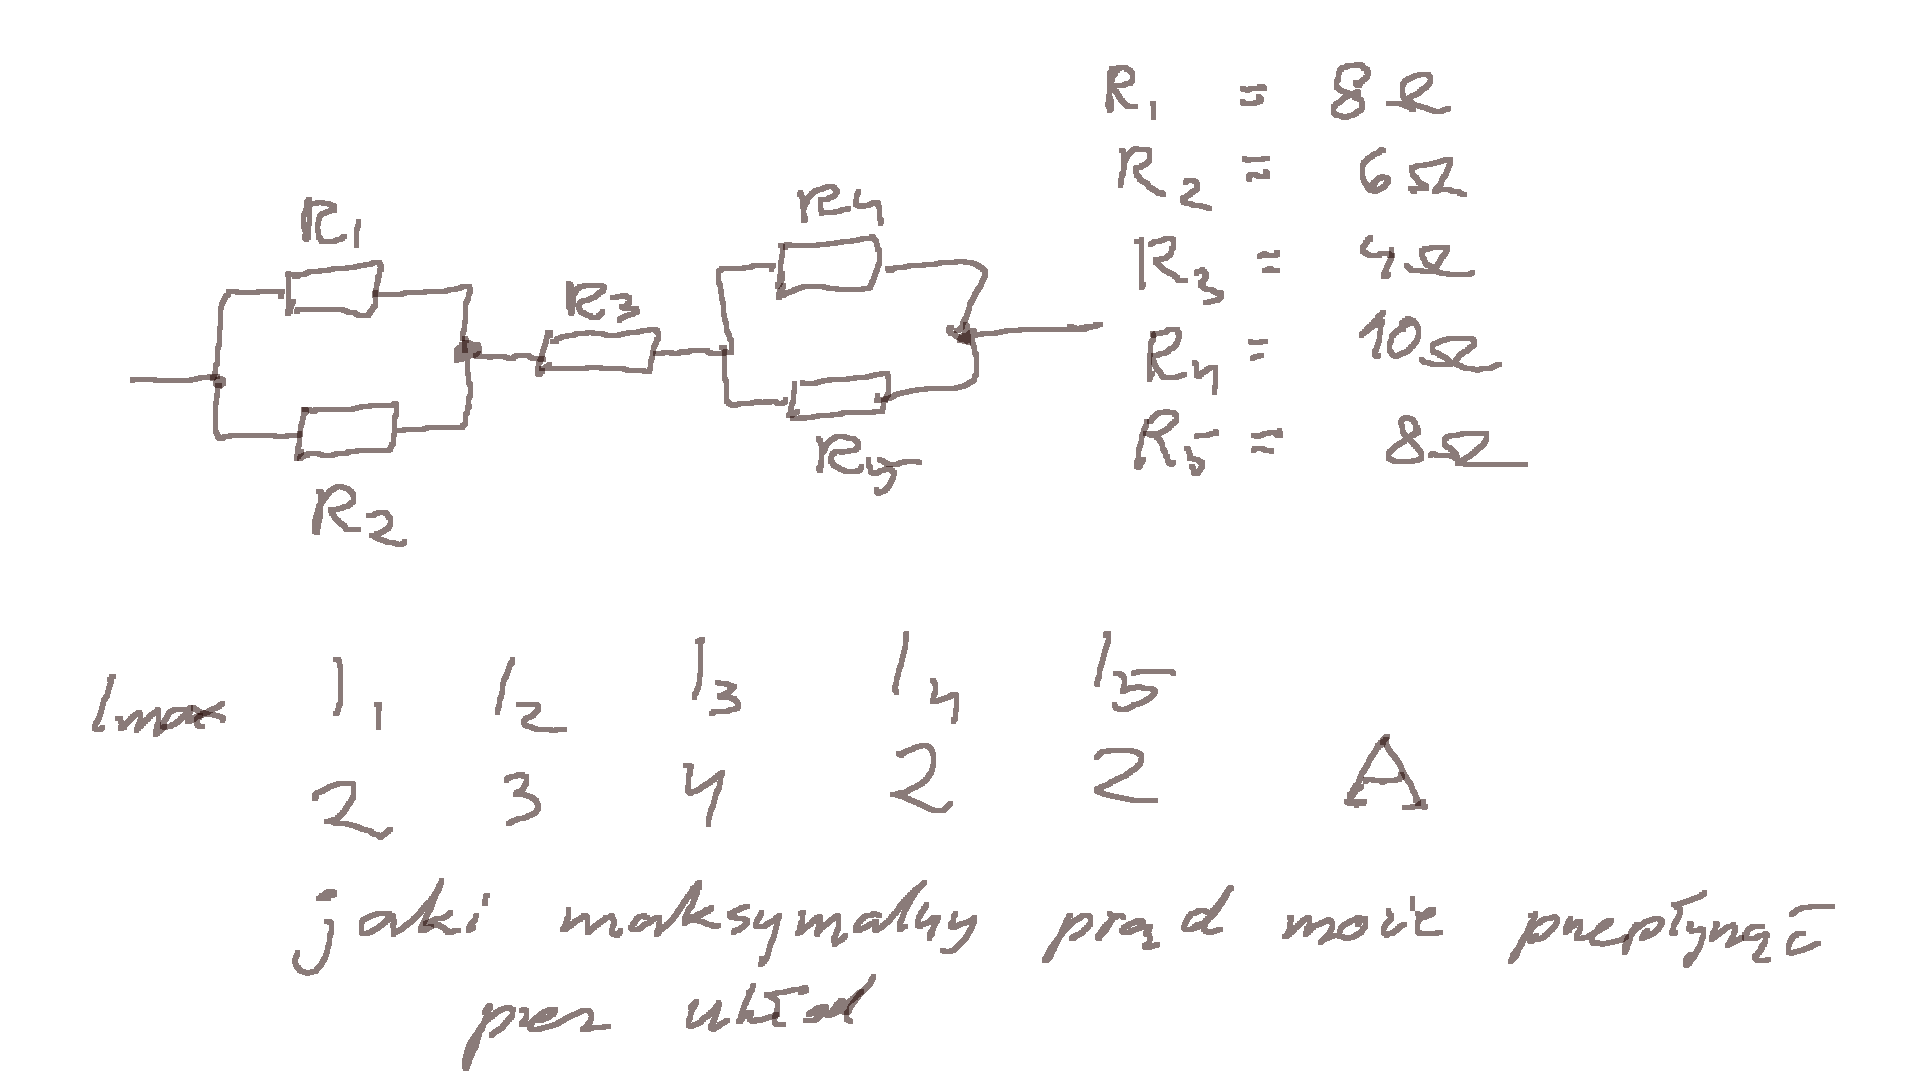

In [1]:
!pip install pulp
import pulp
print(pulp.__version__)
!sudo apt-get install coinor-cbc glpk-utils coinor-clp
from pulp import *

     |████████████████████████████████| 40.6MB 113kB/s 
2.3.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]


In [3]:
#Zdefiniowanie problemu i zmiennych decyzyjnych
problem_maximum_pradu = LpProblem("Maximum_pradu_ukladu", LpMaximize)

I_1=LpVariable("I_1",0)
I_2=LpVariable("I_2",0)
I_3=LpVariable("I_3",0)
I_4=LpVariable("I_4",0)
I_5=LpVariable("I_5",0)



In [4]:
# Funkcje do zmaksymalizowania
problem_maximum_pradu += I_3 , "prad R3"
problem_maximum_pradu += I_1 + I_2 == I_3, "Prad pierwsza galaz"
problem_maximum_pradu += I_4 + I_5 == I_3, "Prad druga galaz"
problem_maximum_pradu += I_1 * 8 == I_2*6, "Napiecie pierwsza galaz"
problem_maximum_pradu += I_5 * 8 == I_4*10, "Napiecie druga galaz"

# Ograniczenia
problem_maximum_pradu += I_1 <= 2
problem_maximum_pradu += I_2 <= 3
problem_maximum_pradu += I_3 <= 4
problem_maximum_pradu += I_4 <= 2
problem_maximum_pradu += I_5 <= 2


In [6]:
problem_maximum_pradu.solve()
print(LpStatus[problem_maximum_pradu.status])

Optimal


In [7]:
#Maksymalne prądy płynące w danej gałęzi

for variable in problem_maximum_pradu.variables():
    print (variable.name, "=", variable.varValue)

print("Maksymalny prad plynacy przez uklad = ",I_3.varValue," A")

I_1 = 1.5428571
I_2 = 2.0571429
I_3 = 3.6
I_4 = 1.6
I_5 = 2.0
Maksymalny prad plynacy przez uklad =  3.6  A
